In [1]:
import numpy as np
from DumbTruck import DumbTruck

In [2]:
#Set up the data generation
gen = DumbTruck()
initial = np.array([[1],[1]])
process = gen.process(initial, t=10, dt=0.02, k=0.1, ep=0.01)
measure = gen.measure(process, nu=0.01)

In [3]:
#Inspect our outputs to make sure they are correct
process

array([[1.        , 2.        , 2.90249576, 3.71596651, 4.45388839,
        5.11982988, 5.7063104 , 6.23652857, 6.70710318, 7.13407908,
        7.53130917],
       [1.        , 0.90249576, 0.81347075, 0.73792188, 0.66594149,
        0.58648052, 0.53021817, 0.47057461, 0.4269759 , 0.39723009,
        0.35939241]])

In [4]:
measure

array([[1.        , 2.        , 2.90249576, 3.71596651, 4.45388839,
        5.11982988, 5.7063104 , 6.23652857, 6.70710318, 7.13407908,
        7.53130917],
       [1.00336692, 0.91416259, 0.80258031, 0.73994525, 0.66671339,
        0.60557417, 0.54355761, 0.466759  , 0.43079536, 0.43199985,
        0.36405297]])

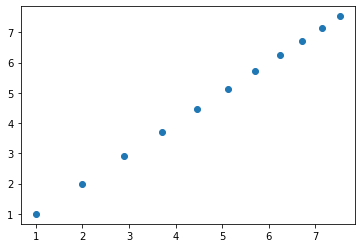

In [5]:
#Plotting only - I use mpl but you can use something else
from matplotlib.pyplot import scatter
scatter(process[0], measure[0])

#Not a ton of noise

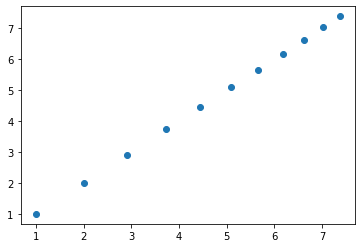

In [8]:
#Trying more measurement noise this time
process = gen.process(initial, t=10, dt=0.02, k=0.1, ep=0.01)
measure = gen.measure(process, nu=0.5)
scatter(process[0], measure[0])


In [44]:
len(process)

2

In [53]:
output = np.array([[],[]])


In [54]:
output

array([], shape=(2, 0), dtype=float64)

In [59]:
xt_measure = DumbTruck.measure_step(process[:,1], 0.1)
output = np.append(output, xt_measure, axis=1)

TypeError: measure_step() missing 4 required positional arguments: 'dt', 'k', 'ep', and 'nu'

In [6]:
measure

array([[2.        , 0.92277793, 2.        , 0.92277793, 2.        ,
        0.92277793, 2.        , 0.92277793, 2.        , 0.92277793,
        2.        , 0.92277793, 2.        , 0.92277793, 2.        ,
        0.92277793, 2.        , 0.92277793, 2.        , 0.92277793,
        2.        , 0.92277793],
       [1.99933257, 0.9221105 , 1.99559628, 0.91837421, 1.97112399,
        0.89390191, 2.00356532, 0.92634325, 2.00351389, 0.92629181,
        2.00858893, 0.93136686, 2.00360623, 0.92638416, 2.01434491,
        0.93712283, 2.01057454, 0.93335247, 1.9983866 , 0.92116452,
        2.00856171, 0.93133964]])